# Exploratory Data Analysis (EDA) of the Human Microbiome
## Domain: Microbiome Data Analysis

### Objective:
The goal of this project is to perform Exploratory Data Analysis (EDA) on a dataset of human microbiome samples to understand the structure, composition, and variability of microbial communities.

### Dataset Overview:
The dataset contains information about various microbiological organisms, their project statuses, sequencing efforts, and related metadata.

### Features:
- **HMP ID**: Unique identifier for each sample.
- **GOLD ID**: Genomic identifier for the sample.
- **Organism Name**: Name of the organism.
- **Domain**: Bacterial or other classification.
- **NCBI Superkingdom**: High-level categorization (e.g., Bacteria).
- **Body Site**: Location in the body from which the sample was collected.
- **Project Status**: Completion status of the project.
- **Gene Count**: Number of genes identified in the sample.

We will explore the dataset by handling missing values, detecting outliers, analyzing descriptive statistics, and applying basic aggregation techniques.

<!-- ("![microbiome.jpg](attachment:microbiome.jpg)") -->

<img src="microbiome.jpg" width=300 height=300 />


#### Import the necessary modules

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<br>
Load the dataset

In [108]:
micro = pd.read_csv('project_catalog.csv')
# pd.set_option('display.max_rows', None, 'display.max_columns', None)

<br>
Display the first few rows of the dataset

In [109]:
micro.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974"
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517


<br>

#### checking the shape, its columns and the amount of missing data.

In [110]:
missing_values = micro.isnull().sum()
missing_values

HMP ID                        0
GOLD ID                    1132
Organism Name                 0
Domain                      203
NCBI Superkingdom           164
HMP Isolation Body Site       0
Project Status                0
Current Finishing Level    1336
NCBI Submission Status        0
NCBI Project ID               0
Genbank ID                 1336
Gene Count                    0
IMG/HMP ID                    0
HOMD ID                    2518
Sequencing Center             4
Funding Source                0
Strain Repository ID       1538
dtype: int64

<br>

In [111]:
micro.shape

(2915, 17)

<br>

In [112]:
micro.columns 

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID'],
      dtype='object')

<br>

In [113]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HMP ID                   2915 non-null   int64 
 1   GOLD ID                  1783 non-null   object
 2   Organism Name            2915 non-null   object
 3   Domain                   2712 non-null   object
 4   NCBI Superkingdom        2751 non-null   object
 5   HMP Isolation Body Site  2915 non-null   object
 6   Project Status           2915 non-null   object
 7   Current Finishing Level  1579 non-null   object
 8   NCBI Submission Status   2915 non-null   object
 9   NCBI Project ID          2915 non-null   int64 
 10  Genbank ID               1579 non-null   object
 11  Gene Count               2915 non-null   int64 
 12  IMG/HMP ID               2915 non-null   int64 
 13  HOMD ID                  397 non-null    object
 14  Sequencing Center        2911 non-null  

<br>
Any duplicate records were dropped.

In [114]:
micro = micro.drop_duplicates()

<br>
Filled missing categorical values with 'Unknown'

In [115]:
micro['HOMD ID'] = micro['HOMD ID'].fillna('Unknown')
for i in range(40):
    print(micro['HOMD ID'][i])

HOMD: tax_389
Unknown
HOMD: tax_343
HOMD: tax_554
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
HOMD: tax_701
HOMD: tax_701
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
HOMD: tax_121
Unknown
Unknown


<br>
Handling Categorical values

In [116]:
categorical_columns = ['Domain', 'NCBI Superkingdom', 'HMP Isolation Body Site', 'Project Status']
for col in categorical_columns:
    micro[col] = micro[col].astype('category')

micro.dtypes[categorical_columns]

Domain                     category
NCBI Superkingdom          category
HMP Isolation Body Site    category
Project Status             category
dtype: object

<br>

#### Visualizing outliers in the 'Gene Count' using a box plot

<function matplotlib.pyplot.show(close=None, block=None)>

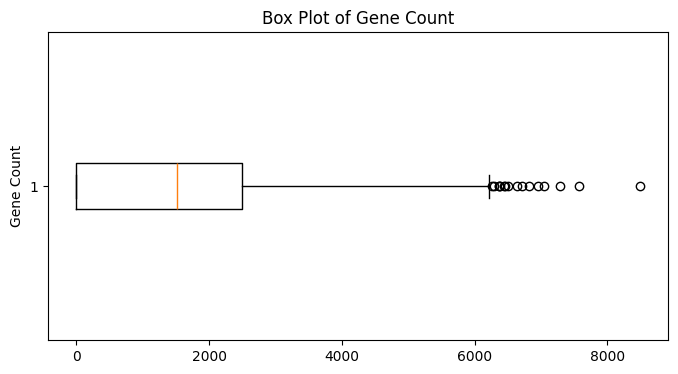

In [117]:
plt.figure(figsize=(8, 4))
plt.boxplot(micro['Gene Count'].dropna(), vert=False)
plt.title('Box Plot of Gene Count')
plt.ylabel('Gene Count')
plt.show

<br>

#### Calculating basic descriptive statistics

- **Mean**: The average gene count.
- **Median**: The middle value of the gene count.
- **Mode**: The most frequent gene count value.
- **Standard Deviation**: Measure of the amount of variation or dispersion.
- **Variance**: The square of the standard deviation.
- **Range**: Difference between the highest and lowest gene counts.
- **IQR**: Interquartile Range, which measures the spread of the middle 50% of values.

In [118]:
stats = {
    'mean': micro['Gene Count'].mean(),
    'median': micro['Gene Count'].median(),
    'mode': micro['Gene Count'].mode()[0],
    'Standard Deviation': micro['Gene Count'].std(),
    'variance': micro['Gene Count'].var(),
    'range_value': micro['Gene Count'].max() - micro['Gene Count'].min(),
    'IQR': micro['Gene Count'].quantile(0.75) - micro['Gene Count'].quantile(0.25)
}

for stat, value in stats.items():
    print(f"\n{stat}:\n{value}")
    
# mean, median, mode, std_dev, variance, range_value, iqr


mean:
1474.622641509434

median:
1517.0

mode:
0

Standard Deviation:
1653.762393406458

variance:
2734930.0538454563

range_value:
8490

IQR:
2489.5


<br>

#### Aggregating gene counts based on the 'Domain' of the organisms
Aggregated the gene count data based on the microbiological domain. <br>
The aggregated statistics include the mean, median, and standard deviation of gene counts for each domain.

In [119]:
aggregation = micro.groupby('Domain')['Gene Count'].agg(['mean', 'median', 'std']).reset_index()

aggregation

C:\Users\anura\AppData\Local\Temp\ipykernel_13004\2561349031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregation = micro.groupby('Domain')['Gene Count'].agg(['mean', 'median', 'std']).reset_index()


,Domain,mean,median,std
0,ARCHAEAL,1712.500000,1712.5,4.949747
1,BACTERIAL,1572.355341,1677.5,1669.934046
2,EUKARYAL,0.000000,0.0,0.000000
3,VIRUS,0.000000,0.0,0.000000
